<a href="https://www.kaggle.com/durgancegaur/how-to-understand-data-using-visualization?scriptVersionId=88860955" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Hi 

<img src="https://media.giphy.com/media/Vbtc9VG51NtzT1Qnv1/giphy.gif">

This is a guide for understanding visualization and how to understand them for beginners.
please do upvote, and comment your insites.
## Lets Get Started


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing, impute

plt.style.use("ggplot")
random_state=42
rng = np.random.default_rng(random_state)

In [2]:
df = pd.read_csv("/kaggle/input/szeged-weather/weatherHistory.csv")
df["Formatted Date"]= pd.to_datetime(df["Formatted Date"], errors='coerce', utc=True)
df.drop("Loud Cover",inplace =True,axis =1)
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
1 2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                   251.0          15.8263               1015.13   
1                   259.0          15.8263               1015.63   
2                   204.0          14.9569               1015.94   
3                   269.0          15.8263               1016.41   
4                   259.0          15.8263               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

<img src="https://media.giphy.com/media/waBshc4T2RcQGVd9MR/giphy.gif">

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Pressure (millibars)      96453 non-null  float64            
 10  Daily Summary             96453 non-null  object             
dtypes: datetime64[n

In [4]:
cat_col = ["Summary","Precip Type","Daily Summary"]
num_col = ["Temperature (C)","Apparent Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

# Exploratory Data Analysis

<img src="https://media.giphy.com/media/3og0IExSrnfW2kUaaI/giphy.gif">

## First Question should be why do we need this ??

Out Come of this phase is as given below : 

- Understanding the given dataset and helps clean up the given dataset.
- It gives you a clear picture of the features and the relationships between them.
- Providing guidelines for essential variables and leaving behind/removing non-essential variables.
- Handling Missing values or human error.
- Identifying outliers.
- EDA process would be maximizing insights of a dataset.
- This process is time-consuming but very effective,

# First we start with checking for missing values :

Missing values are not always due to sore problem, they can have conceptual meaning to a particular feature , no meaninig for some features, 
```python
%timeit df.isnull().any().any()
46.2 ms ± 899 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
%timeit df.isnull().values.any()
44.6 ms ± 731 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
%timeit df.isna().values.any()
41.8 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
%timeit np.isnan(df.values).any()
41.3 ms ± 368 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

We will come back to this in some time

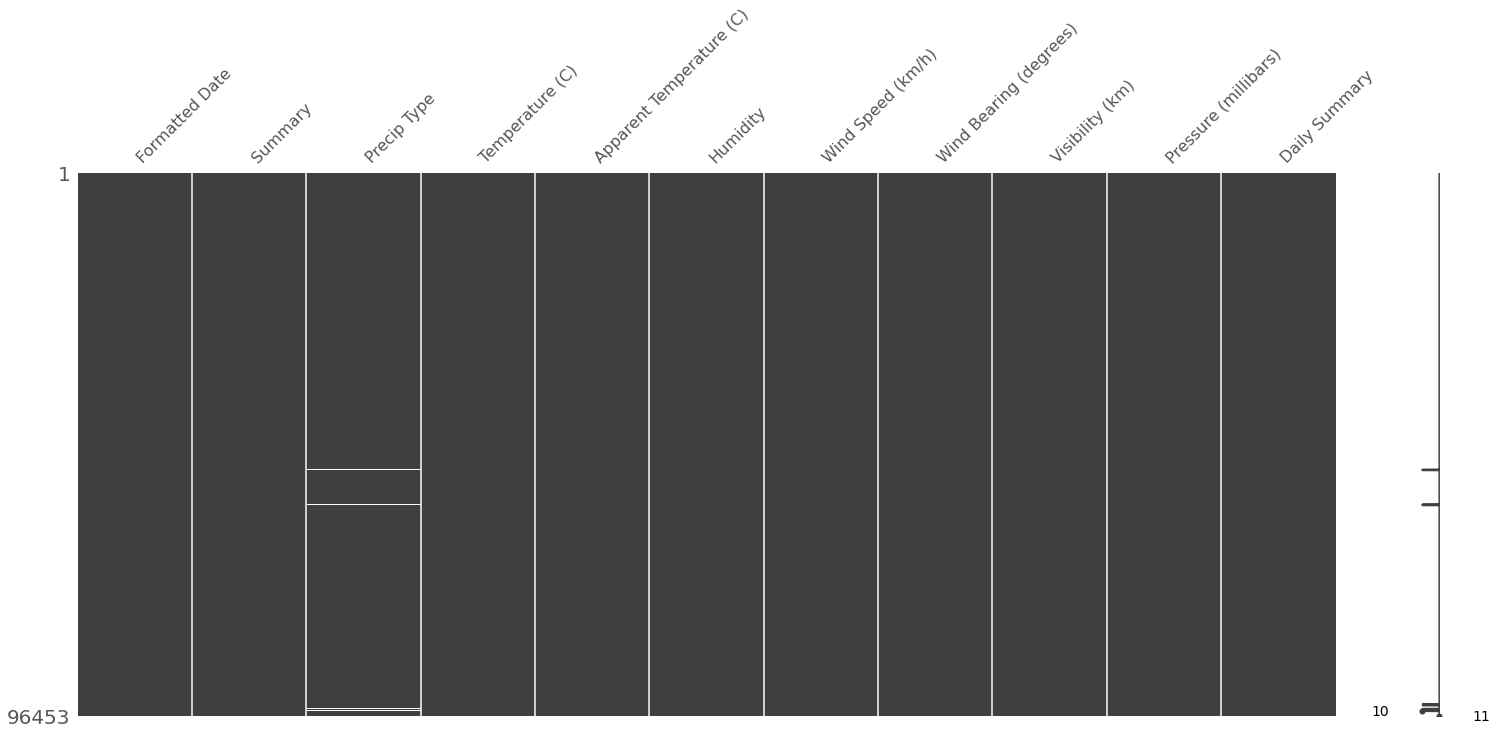

In [5]:
import missingno as msno
msno.matrix(df)
plt.show()

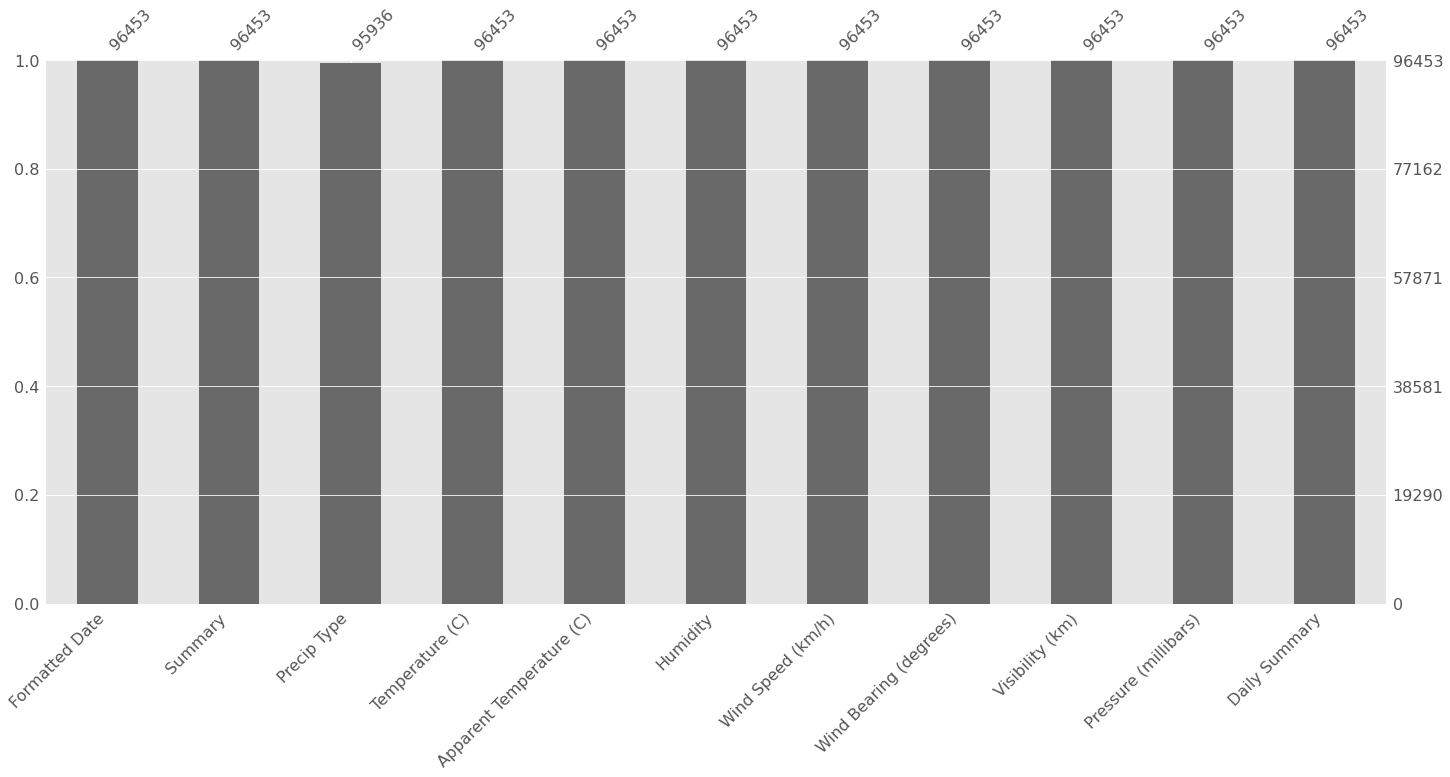

In [6]:
msno.bar(df)
plt.show()

## HeatMap : 

<img src="https://media.giphy.com/media/uk6hDJFlvFNGxjssqT/giphy.gif">

A heatmap is a graphical representation where individual values of a matrix are represented as colors. A heatmap is very useful in visualizing the concentration of values between two dimensions of a matrix. This helps in finding patterns and gives a perspective of depth.

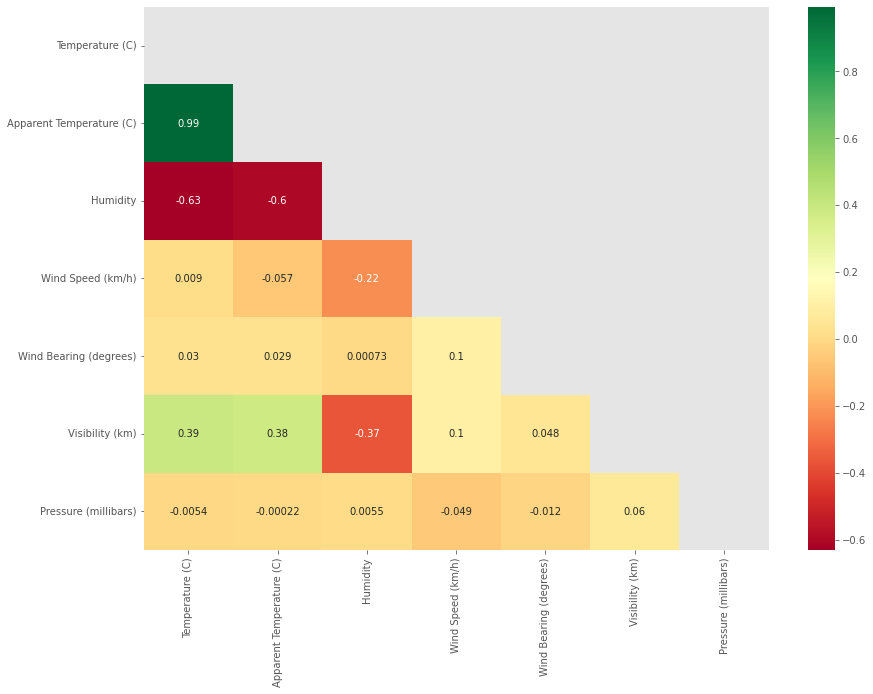

In [7]:
## Feature Interactions:
plt.figure(figsize = (14,10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap="RdYlGn",mask = mask,annot=True)
plt.show()

In [8]:
print(df.apply(lambda x: x.nunique()))
df.describe().T.style.background_gradient(
    vmin=-1, vmax=1, cmap=sns.color_palette("vlag", as_cmap=True))

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


## Plotting out tabular data Always looks better to the eyes, to the heart and to our logical thinking as well. 😏

In [9]:
def annotate_plot(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0, 8),
                       textcoords='offset points')

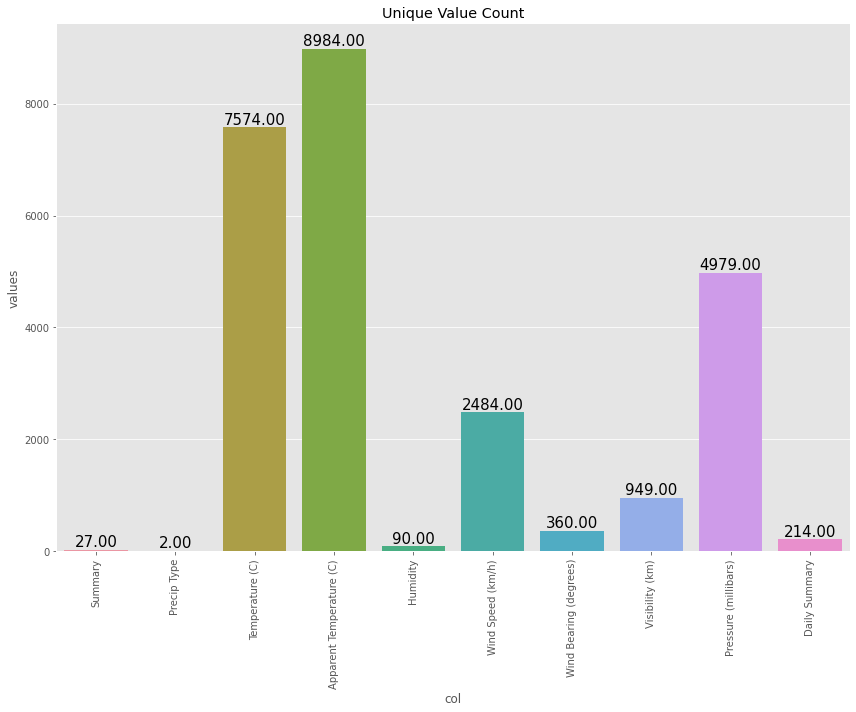

In [10]:
plt.figure(figsize=(12,10))
unique_df = pd.DataFrame(df.apply(lambda x: x.nunique()))
unique_df.drop("Formatted Date",inplace =True)
unique_df = unique_df.reset_index()
unique_df.columns = ["col","values"]
g = sns.barplot(x="col",data = unique_df, y= "values")
annotate_plot(g)
plt.xticks(rotation=90)
plt.title("Unique Value Count")
plt.tight_layout()
plt.show()

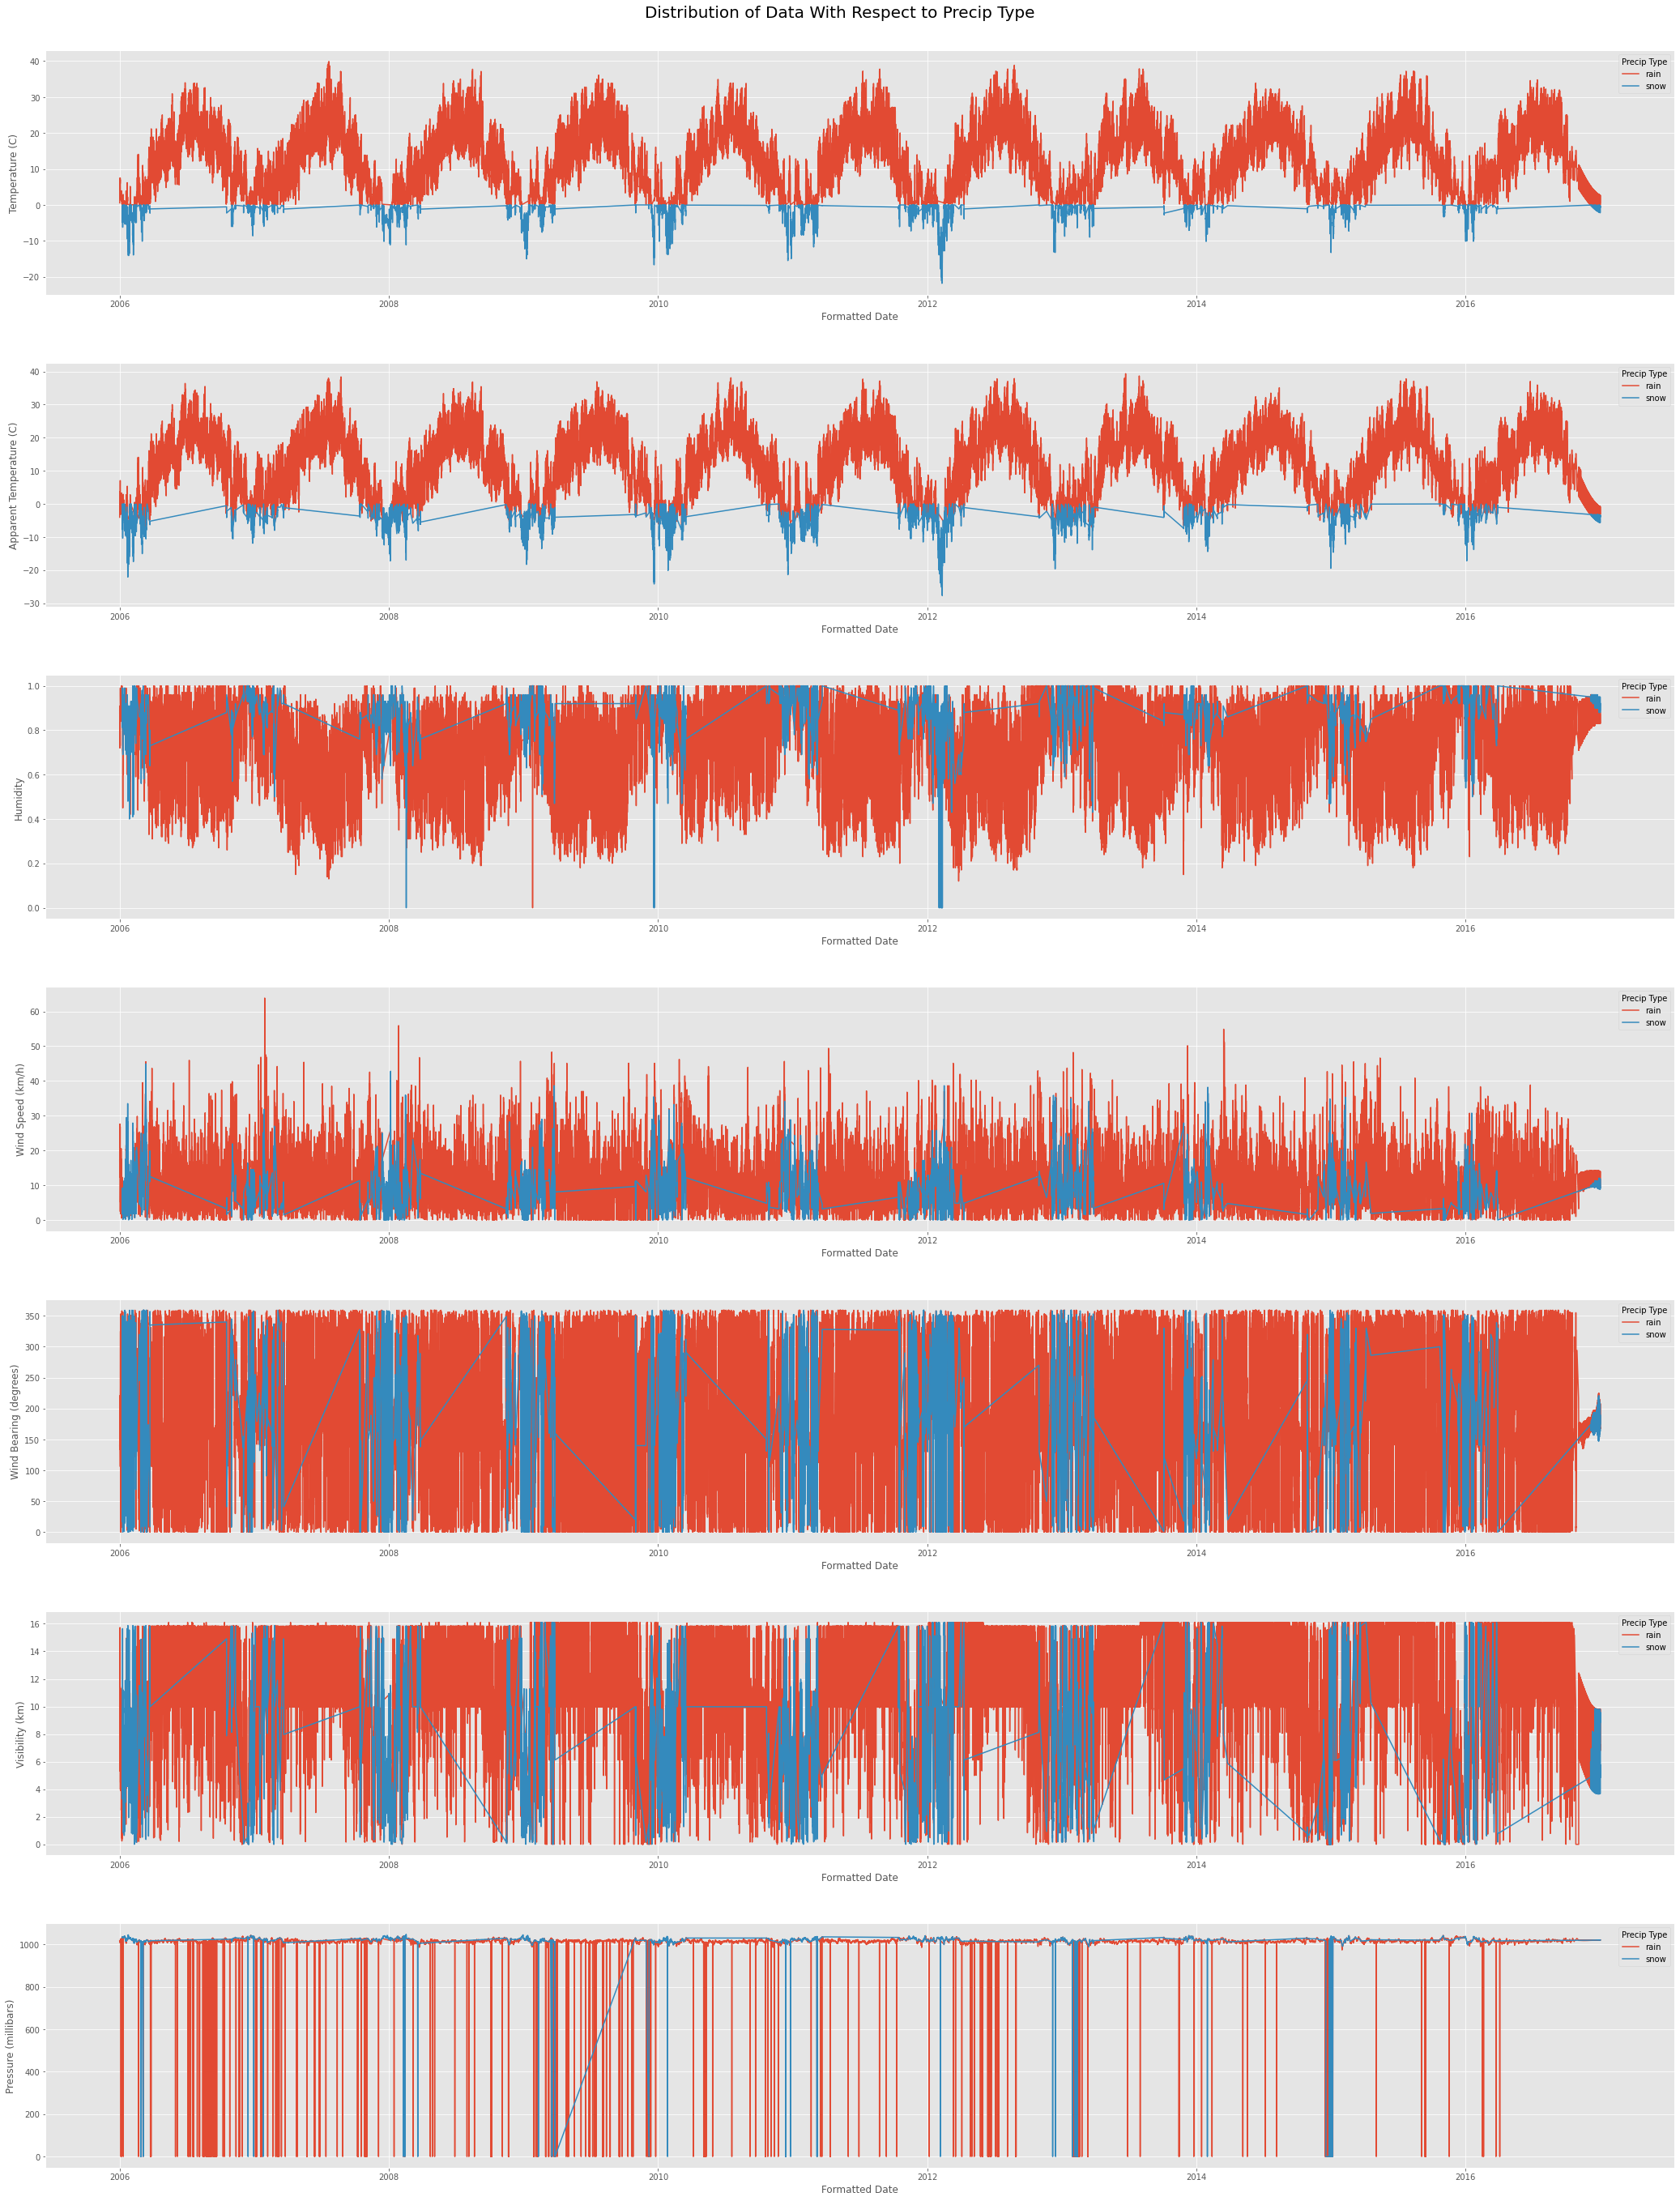

In [11]:
plt.figure(figsize=(30, len(df.columns)*4))
for i,col in enumerate(num_col,1):
    ax = plt.subplot(8,1,i)
    sns.lineplot(data = df , x= "Formatted Date", y =col, hue = cat_col[1] )
    
plt.suptitle(f"Distribution of Data With Respect to {cat_col[1]}", fontsize = 20)

plt.tight_layout(pad = 5)
plt.show()

In [12]:
df_date = df.set_index("Formatted Date")

# Auto Correlation Plot for Time Series Plot

We can quantify the strength and type of relationship between observations and their lags.

In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation).

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function.


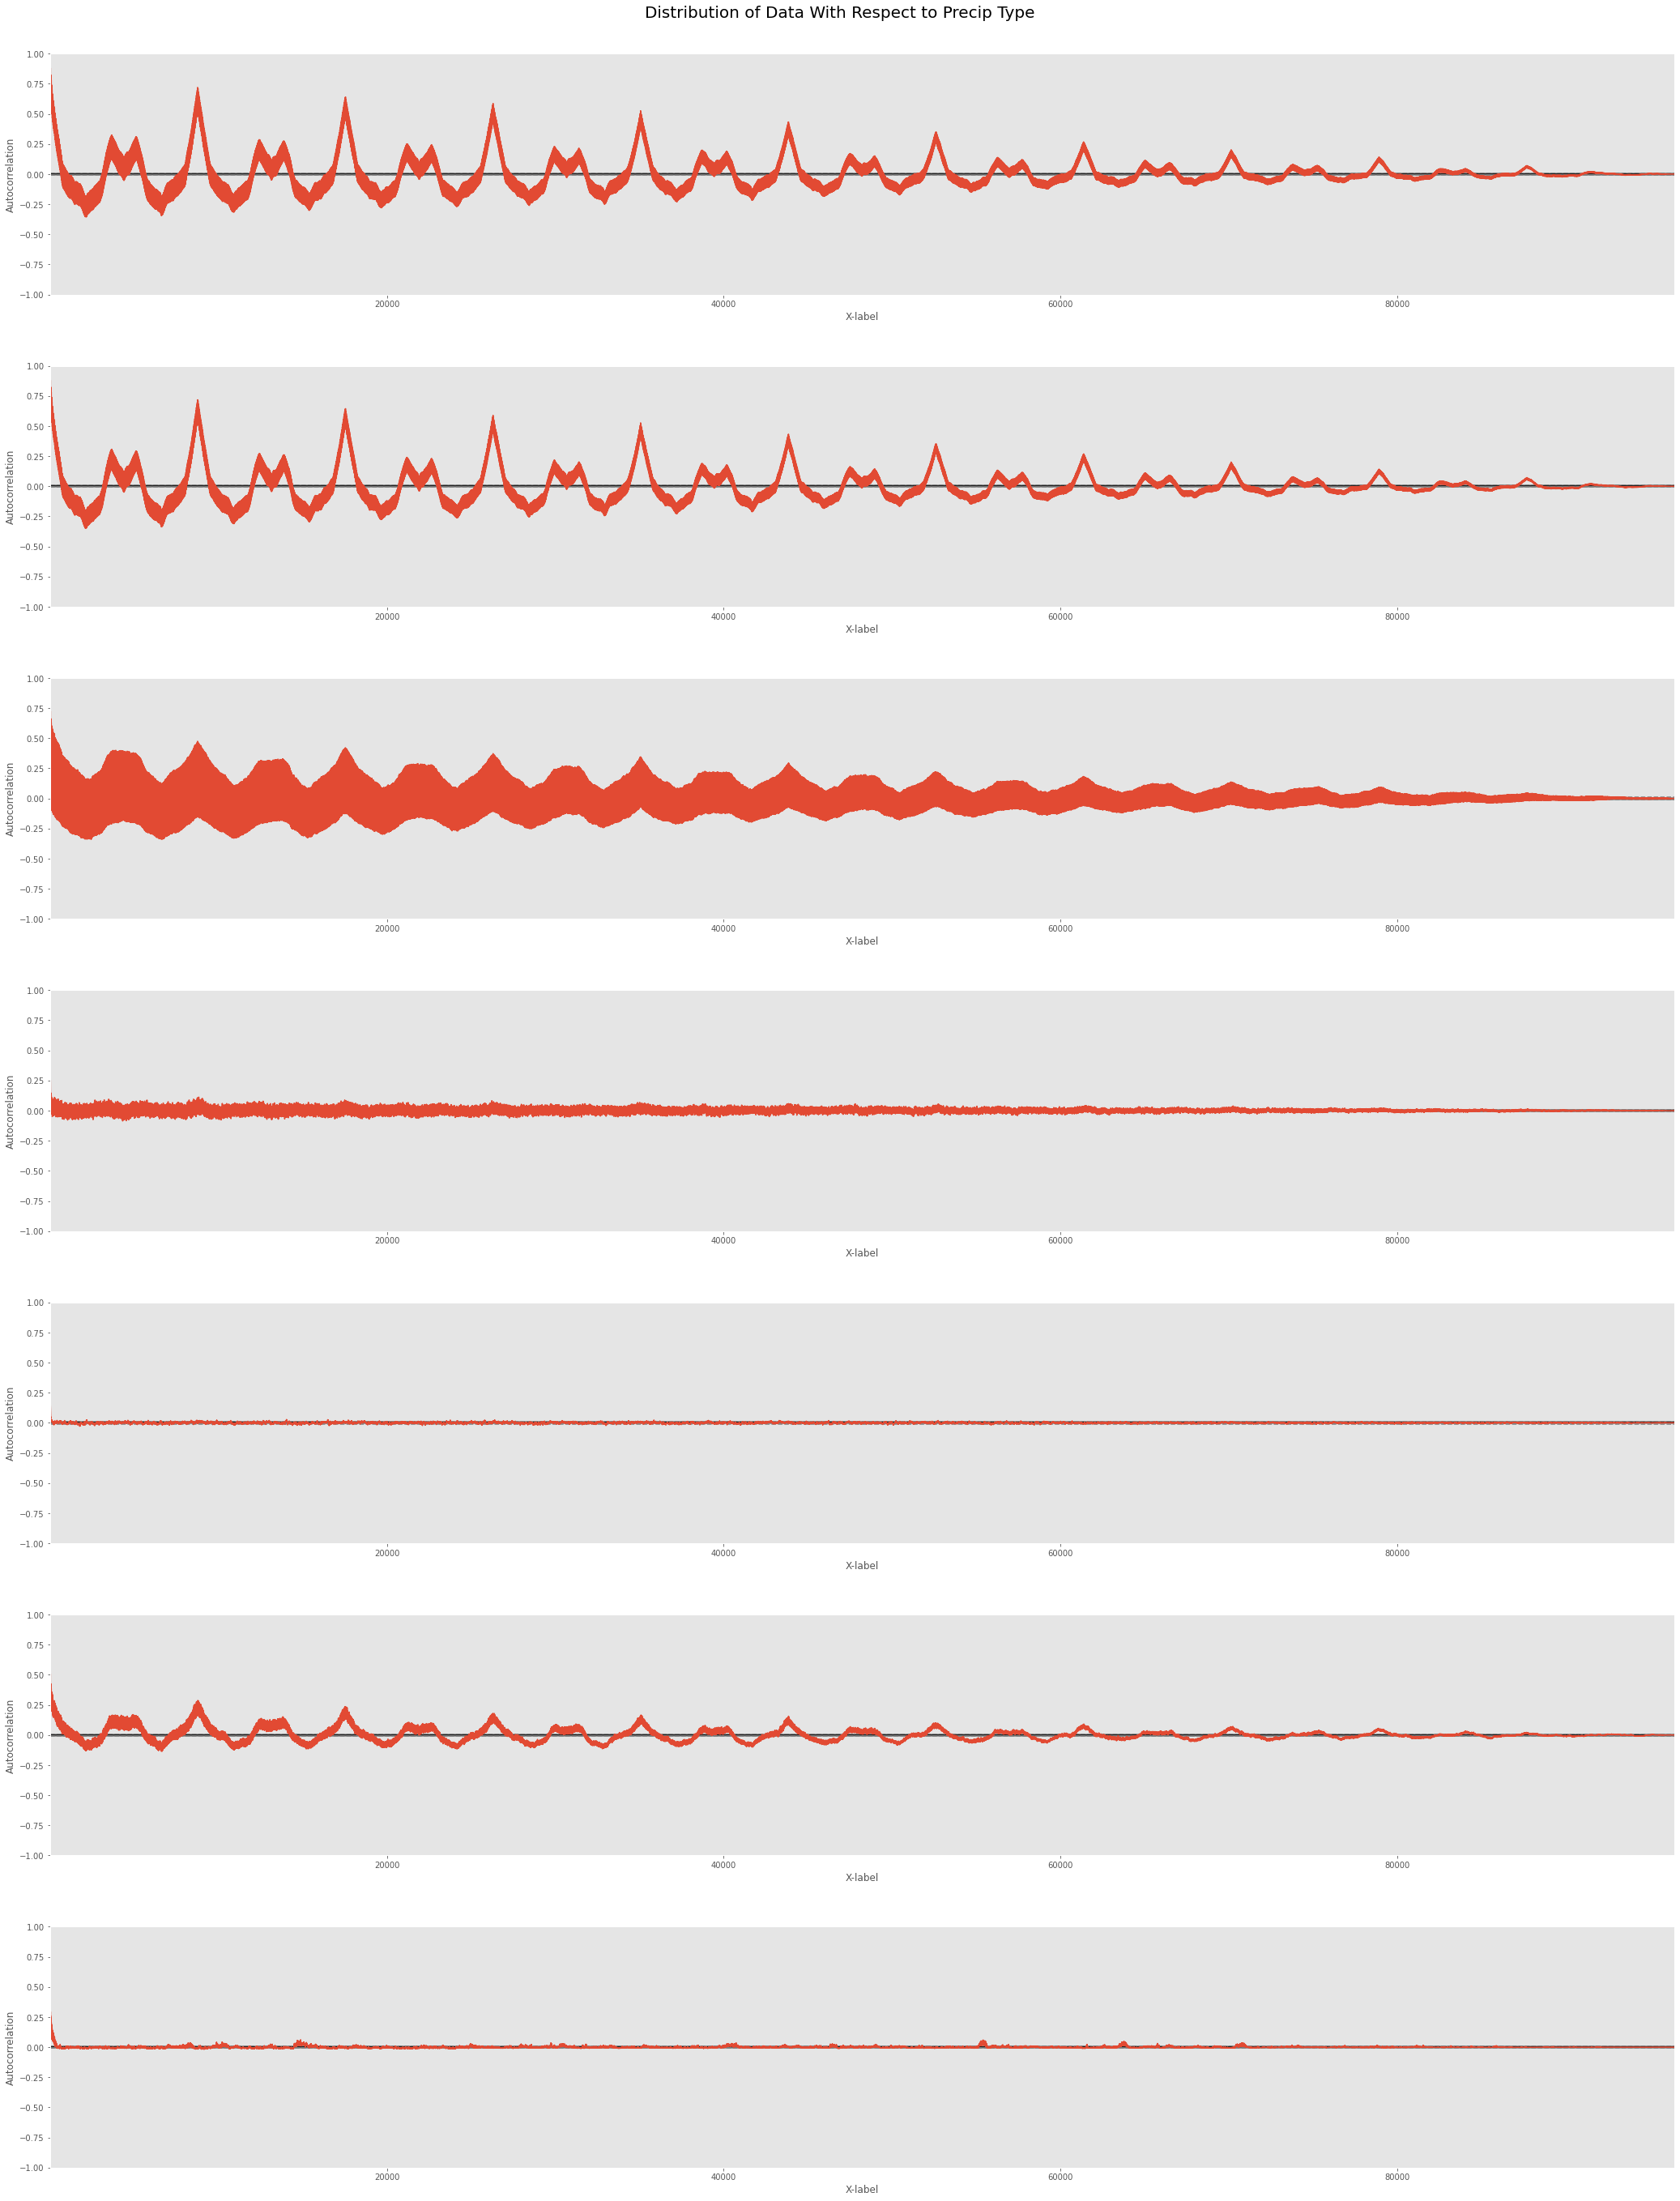

In [13]:
plt.figure(figsize=(30, len(df.columns)*4))
for i,col in enumerate(num_col,1):
    ax = plt.subplot(8,1,i)
    pd.plotting.autocorrelation_plot(df[col])
    plt.xlabel("X-label")
plt.suptitle(f"Distribution of Data With Respect to {cat_col[1]}", fontsize = 20)

plt.tight_layout(pad = 5)
plt.show()

plt.show()

# Understanding Data Using Some Statistics: 

<img src= "https://media.giphy.com/media/9ADoZQgs0tyww/giphy.gif">

Okay so dont worry we are not going to take a deep dive in statistics here, So In Statistics, QQ(Quantile Quantile) Plot plays a very vital role to graphically analyse and compare two probability distributions by plotting there quantiles agains each other. If the two distributions whic we have compaired are exactly equal then the points on the QQ plot will form a perfect straight line y=x.

It is very important for us to know weather our data is normal or not so as to apply various statistical measures on the data and interpret it in much more human understandable visualization and there Q-Q Plot comes into the picture.The most fundamental question answered by QQ-q plot out data normally ditributed


<img src = "https://i.stack.imgur.com/NpI0O.png">

This is how a Normally Distributed Q-Q Plot looks like much like a straight line Y=X.

## Now must be asking why the heck do we need our data to be Normally Distributed?

QQ plot are used to find the type of distribution for a random variable weather it be a Gaussian Disribution, Uniform Distribution , Exponential Distribution . We can tell the type of distribution just by looking at the QQ plot. In general we are talking about Normal Distribution as it works the best while fitting data to our ML model. And when we have a normal distribution of data we have some properties of our data such as we know the first standard deviation, second std. deviation of our data.


**Q-Q plots** take your sample data, sort it in ascending order, and then plot them versus quantiles calculated from a theoretical distribution. The number of quantiles is selected to match the size of your sample data. While Normal Q-Q Plots are the ones most often used in practice due to so many statistical methods assuming normality, Q-Q Plots can actually be created for any distribution


## Now comes the part when we get some understanding from our QQ plots.

Now we will focus on the ends of the straight line. If the points at the ends of the curve formed from the points are not falling on a straight line but indeed are scattered significantly from the positions then we cannot conclude a relationship between the x and y axes which clearly signifies that our ordered values which we wanted to calculate are not Normally distributed.
Just like out plots of ***Humidity , Wind , Wind Bending , Visibility*** which are not a complete straight line.

These Plots which are called **Skewed Q-Q Plots :**

When we plot theoretical quantiles on the x-axis and the sample quantiles whose distribution we want to know on the y-axis then we see a very peculiar shape of a Normally distributed Q-Q plot for skewness. If the bottom end of the Q-Q plot deviates from the straight line but the upper end is not, then we can clearly say that the distribution has a longer tail to its left or simply it is left-skewed (or negatively skewed) but when we see the upper end of the Q-Q plot to deviate from the straight line and the lower and follows a straight line then the curve has a longer till to its right and it is right-skewed (or positively skewed).

We Have some more type of QQplot which is **Tailed QQ Plots :**

like : ***Temperature , Apparent Temperature***



So we did all this observation to get an understanding of which type of preprcessing technique to appply on our data to make our data normal, which in turn helps out machine Learning model to give better prediction


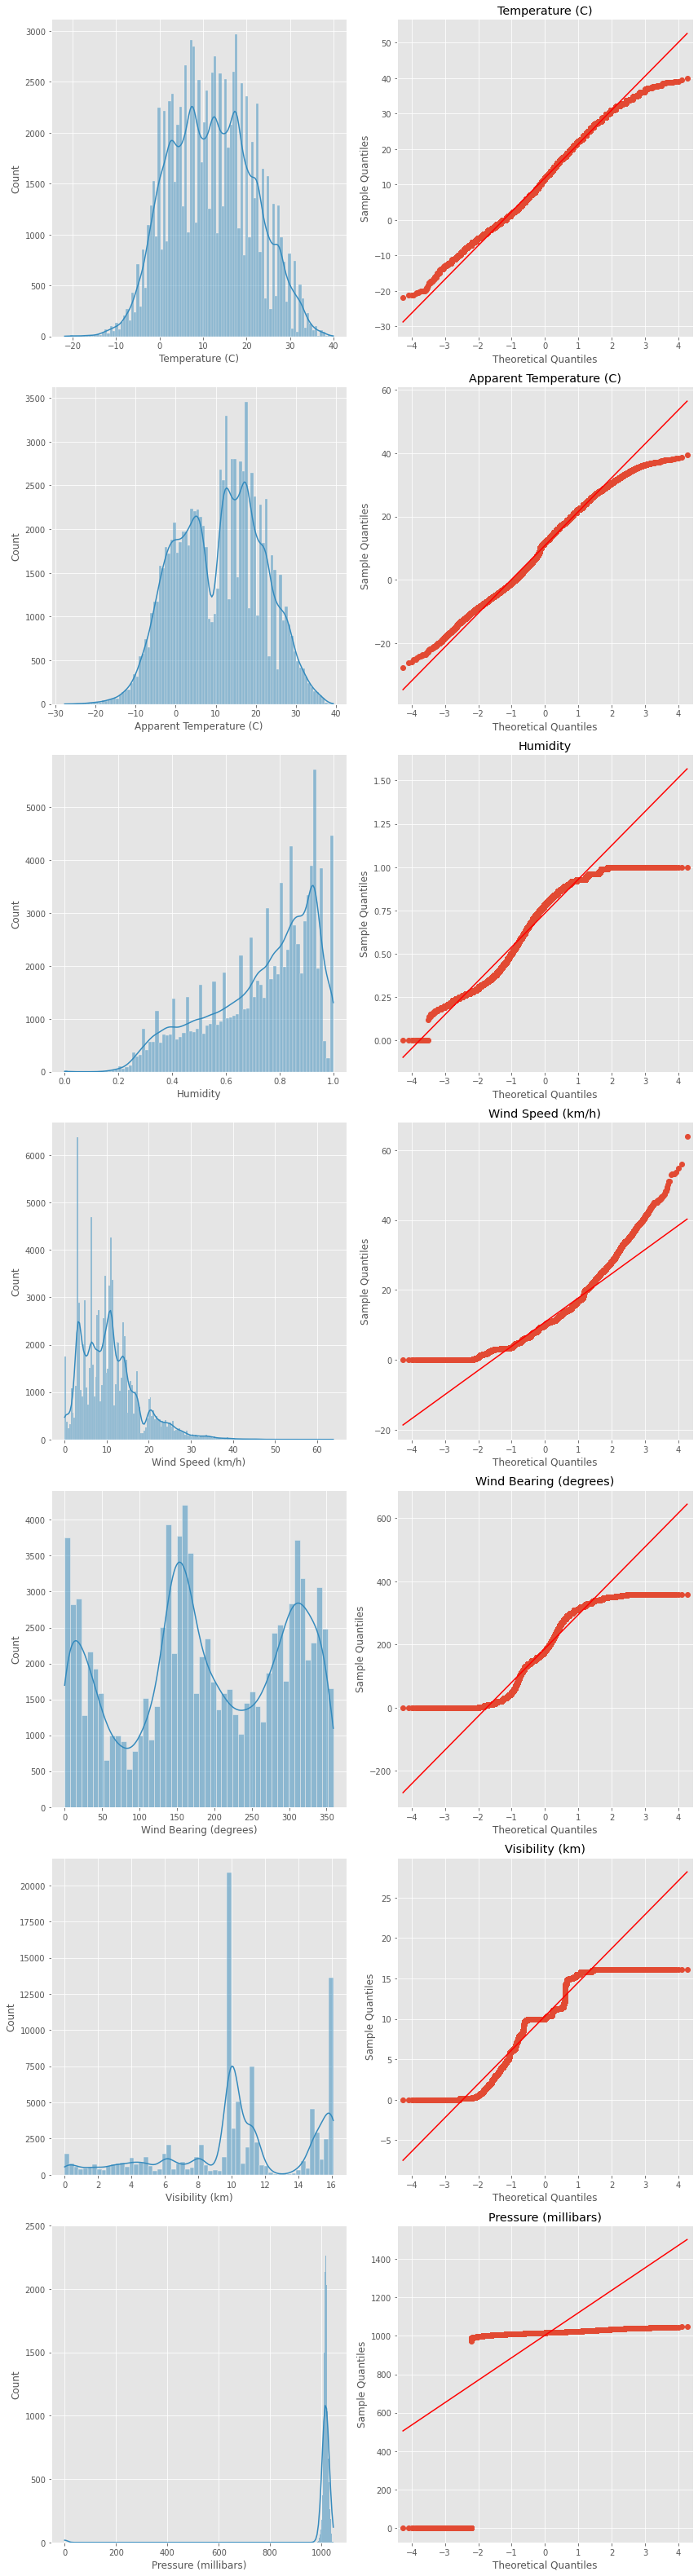

In [14]:
fig,axes = plt.subplots(len(num_col),2,figsize=(12, len(df.columns)*4))
for i, col in enumerate(num_col):
    sns.histplot(df[col], ax = axes[i,0],kde =True)
    sm.qqplot(df[col].dropna(),line = "s",fmt = "b",ax = axes[i,1])
    axes[i, 1].set_title(col)

plt.tight_layout()
plt.show()

So now, we have seen the QQ plot some of the plots seems to a lot deviating of the desired for of distribution, we can start with applying log transformation on the features which are skewed. As a start and try to look for various distribution which can be helpfull for overcomming the skewness and Tialed characteristcs of the distribution,

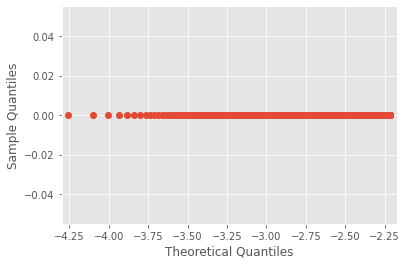

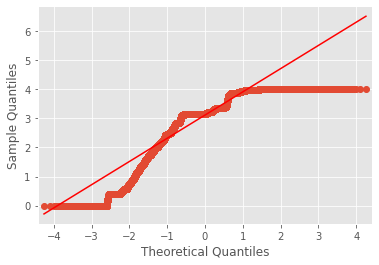

In [15]:
# Applying varoius Trasfomation on data.
_ = sm.qqplot(
    df['Pressure (millibars)'].dropna().apply(
        lambda x: np.log1p(-x)),
    line="s", fmt='b'
)

_ = sm.qqplot(
    df['Visibility (km)'].dropna().apply(
        lambda x: np.sqrt(x)),
    line="s", fmt='b'
)

Here we are checking for differnt transformation and tying to find the best transformation which can convert our distribution to a normal Distribution

In [16]:
def scale_data(X):
    inv_sigmoid = lambda x: np.log(x / (1-x))
    
    X = X.copy()
    for col in num_col:
        X[col] = preprocessing.minmax_scale(X[col], feature_range=(0+1e-6, 1-1e-6))
        X[col] = X[col].apply(inv_sigmoid)
    X[num_col] = preprocessing.power_transform(X[num_col])
    #X['loudness'] = X['loudness'].apply(lambda x: np.log1p(-x))
    return X
df_scaled = scale_data(df)

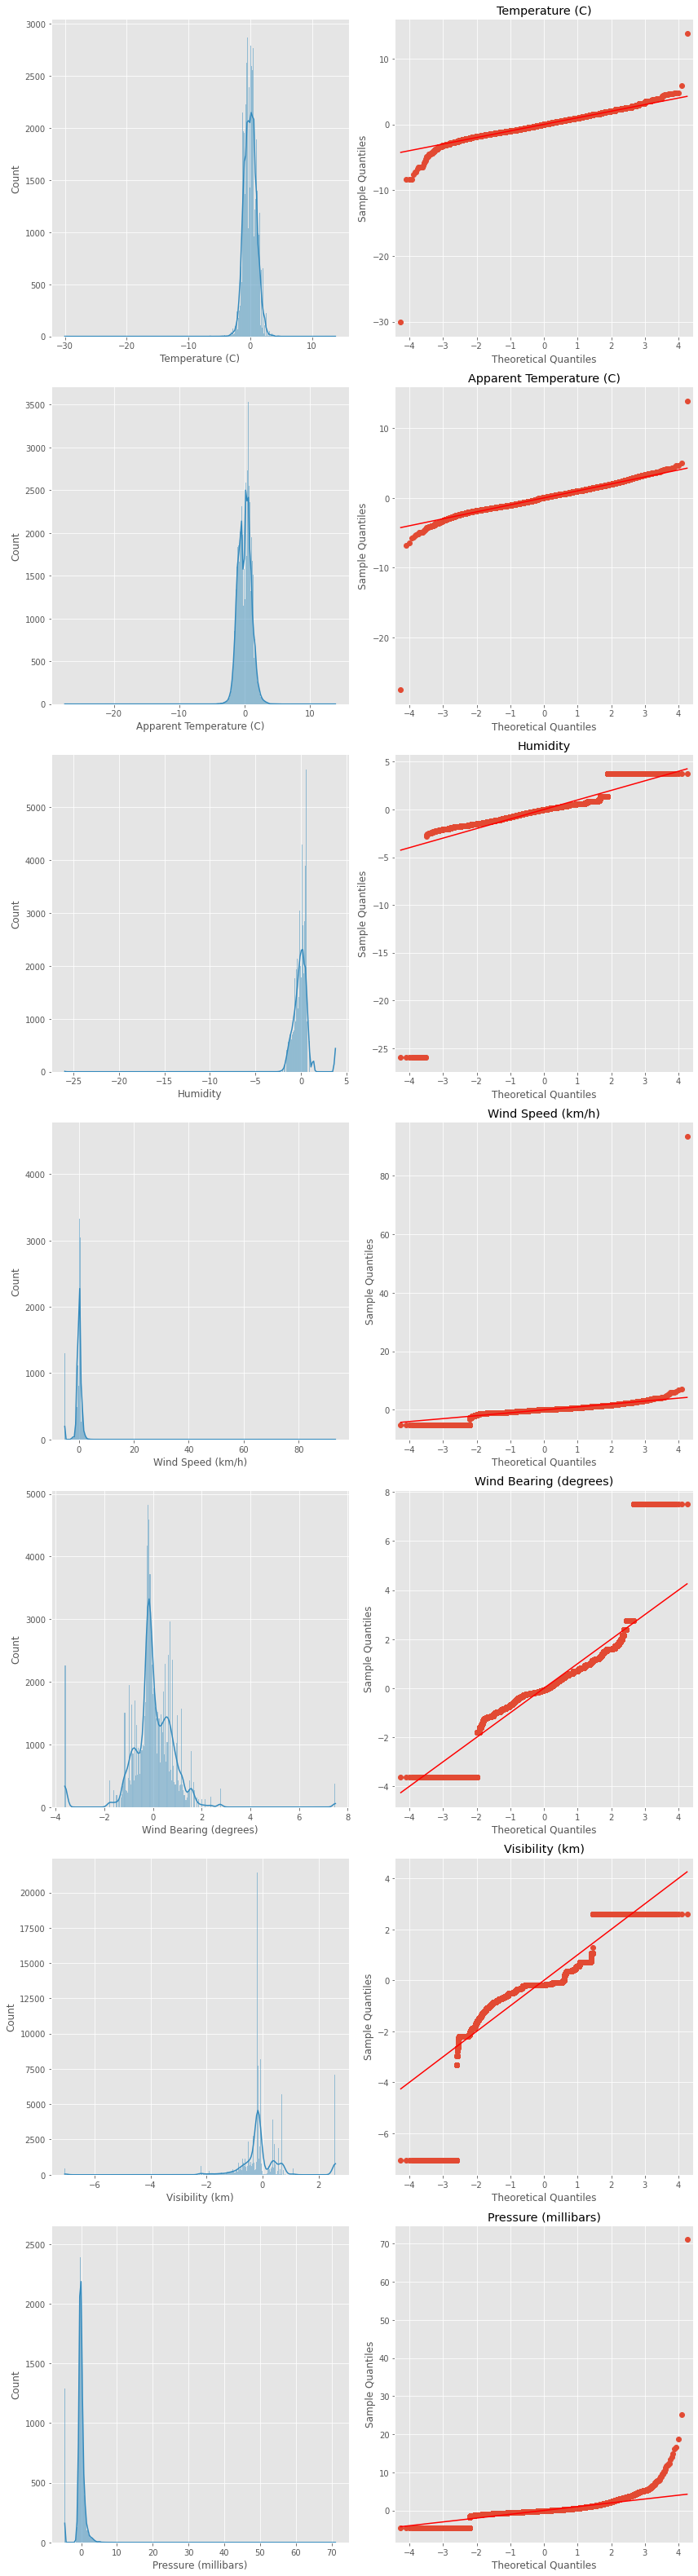

In [17]:
fig,axes = plt.subplots(len(num_col),2,figsize=(12, len(df.columns)*4))
for i, col in enumerate(num_col):
    sns.histplot(df_scaled[col], ax = axes[i,0],kde =True)
    sm.qqplot(df_scaled[col].dropna(),line = "s",fmt = "b",ax = axes[i,1])
    axes[i, 1].set_title(col)

plt.tight_layout()
plt.show()

# Now New Question What to do with the data 

### What is Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here's the fromula for normalization : 

<img src="https://i.stack.imgur.com/EuitP.png" width=40%>

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

## What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

Here's the formula for Standarization:

<img src="https://clavelresearch.files.wordpress.com/2019/03/z-score-population.png" width=30%>

## The Big Question – Normalize or Standardize?

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. 

### Robust Scaler
When working with outliers we can use Robust Scaling for scakling our data,
It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. 
The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. 
RobustScaler uses the interquartile range so that it is robust to outliers

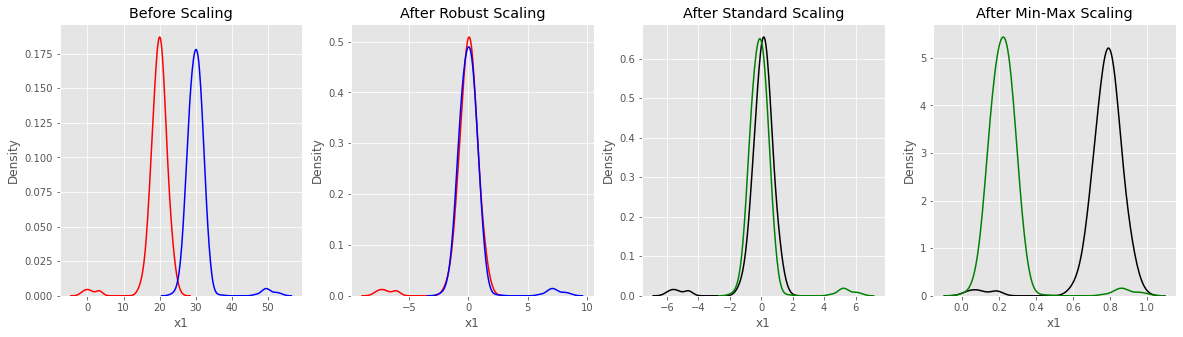

In [18]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

As we can see now our distribution if mostly Normalised and is ready to be used for processing and out ML model

# Cluster Map

## Your Question here should be What is Clustering?

Clustering is basically grouping data based on relationships among the variables in the data.  Clustering algorithms help in getting structured data in unsupervised learning. The most common types of clustering are shown below.

<img src= "https://media.geeksforgeeks.org/wp-content/uploads/20201123104401/Untitleddesign1.png">

Here we are going to see hierarchical clustering especially Agglomerative(bottom-up) hierarchical clustering. In Agglomerative clustering, we start with considering each data point as a cluster and then repeatedly combine two nearest clusters into larger clusters until we are left with a single cluster. The graph we plot after performing agglomerative clustering on data is called Dendrogram

## Plotting Hierarchically clustered Heatmaps

Coming to the heat map, it is a graphical representation of data where values are represented using colors. Variation in the intensity of color depicts how data is clustered or varies over space.

The clustermap() function of seaborn plots a hierarchically-clustered heat map of the given matrix dataset. It returns a clustered grid index. 

If we take an example of the [Flights](https://github.com/mwaskom/seaborn-data/blob/master/flights.csv) Dataset : 


```python
# Importing the library
import seaborn as sns
from sunbird.categorical_encoding import frequency_encoding
  
# Load dataset
data = sns.load_dataset('flights')
  
# Categorical encoding
frequency_encoding(data, 'month')
  
# Clustering data row-wise and
# changing color of the map.
sns.clustermap(data, figsize=(7, 7))
```

**Output :**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201126143308/e1.png">

The legend to the left of the cluster map indicates information about the cluster map e.g bright color indicates more passengers and dark color indicates fewer passengers.

```python
# Importing the library
import seaborn as sns
from sunbird.categorical_encoding import frequency_encoding
  
# Load dataset
data = sns.load_dataset('flights')
  
# Categorical encoding
frequency_encoding(data, 'month')
  
# Clustering data row-wise and
# changing color of the map.
sns.clustermap(data, cmap='coolwarm', figsize=(7, 7))
```

**Output :**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201126143656/e2.png">


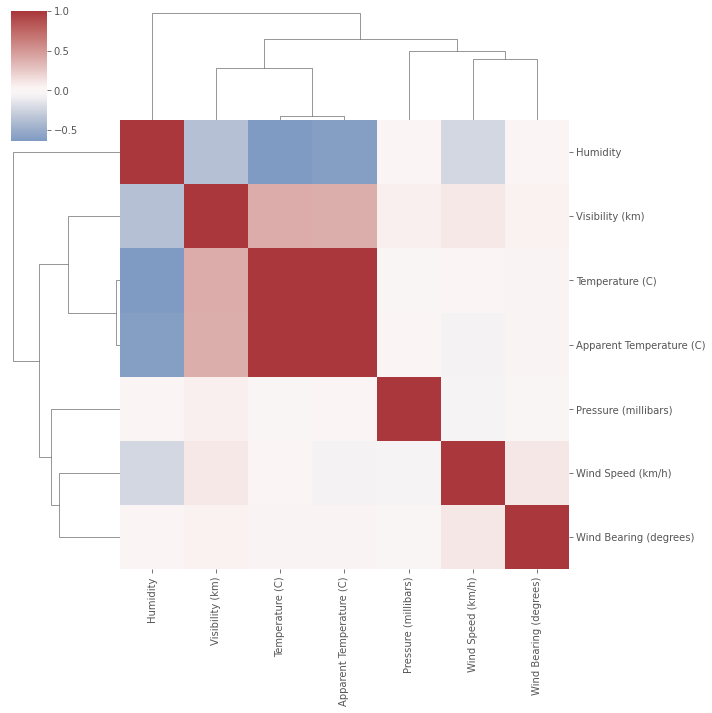

In [19]:
sns.clustermap(df.corr(), center=0, cmap="vlag")

# PCA (Principle Component Analysis) : 

Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only does this make training extremely slow, it can also make it much harder to find a good solution, as we will see. This problem is often referred to as *the curse of dimensionality*. Fortunately, in real-world problems, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one. For example, consider the MNIST images the pixels on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information. Moreover, two neighboring pixels are often highly correlated, if you merge them into a single pixel (e.g., by taking the mean of the two pixel intensities), you will not lose much information

**THE CURSE OF DIMENTIONALITY**

<img src="https://media.giphy.com/media/xT9DPPHKfbz58057OM/giphy.gif">

>***Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its quality), so even though it will speed up training, it may also make your system perform slightly worse. It also makes your pipelines a bit more complex and thus harder to maintain. So you should first try to train your system with the original data before considering using dimensionality reduction if training is too slow. In some cases, however, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance (but in general it won’t; it will just speed up training)***

# So Why to do PCA in for DataViz must be you Question :

Apart from speeding up training, dimensionality reduction is also extremely useful for data visualization (or DataViz). Reducing the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patterns, such as clusters. Moreover, DataViz is essential to communicate your conclusions to people who are not data scientists, in particular decision makers who will use your results




In [20]:
from sklearn.decomposition import PCA

pca = PCA(random_state=random_state).fit(df_scaled[num_col])

X_pca = pd.DataFrame(pca.transform(df[num_col]), index=df_scaled.index)

pca_comp = pd.DataFrame(pca.components_, index=num_col)
pca_comp.style.background_gradient(
    vmin=-1, vmax=1, cmap=sns.color_palette("vlag", as_cmap=True))

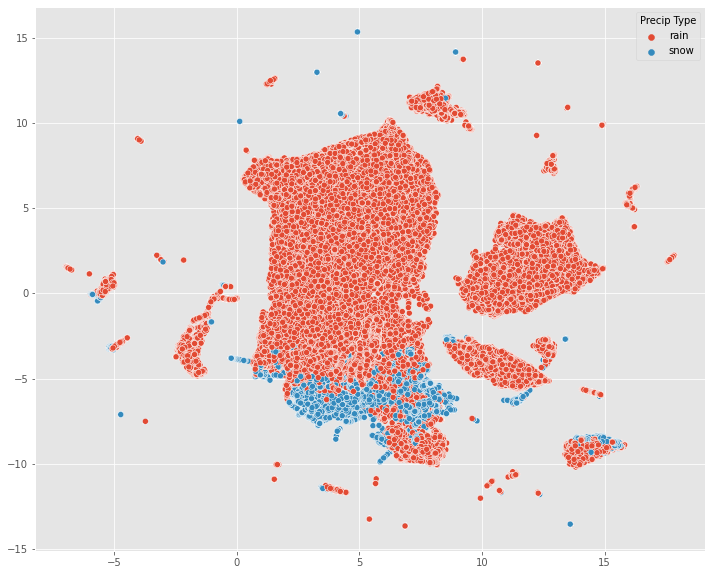

In [21]:
from umap import UMAP
import umap.plot
from sklearn.manifold import TSNE
plt.figure(figsize=(12,10))
proj = UMAP().fit_transform(df_scaled[num_col])
sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=df['Precip Type'])
plt.show()

Here we can see the distribution of Precip Type in our complete data, it seems fairly easy to look and tell using these techniques which part of our data point will will have rain or snow.

# One of the Most Usefull Plot: 
Yes it is what you already knew PairPlot

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.


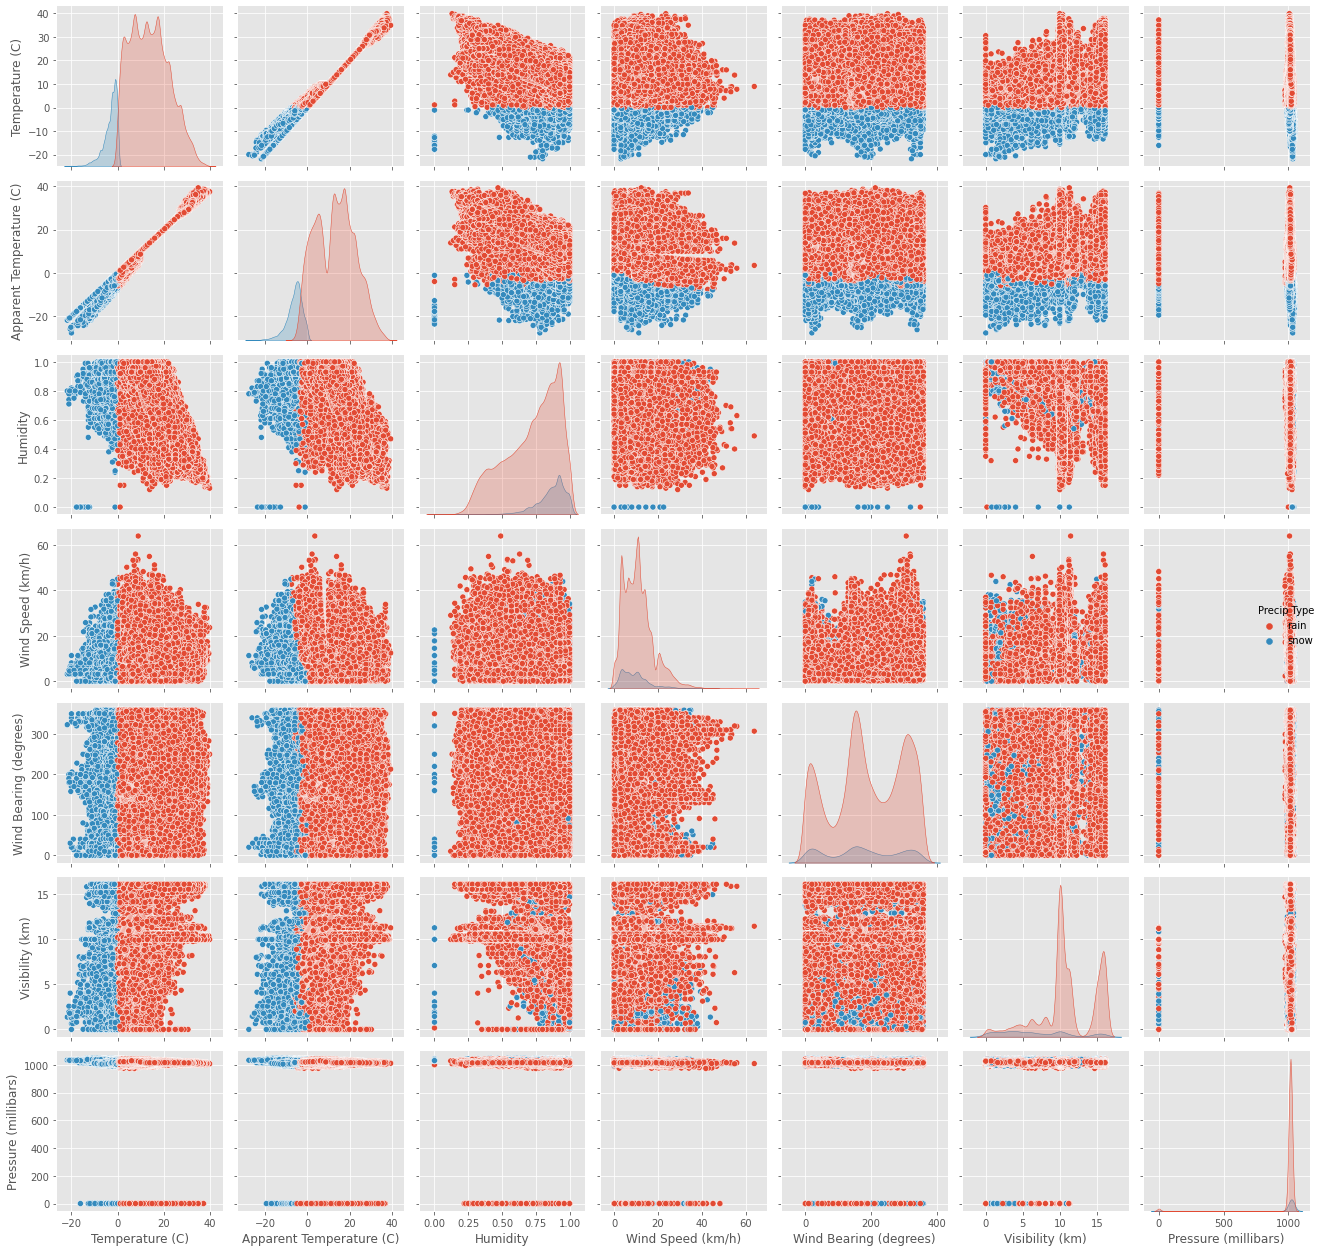

In [22]:
sns.pairplot(df ,hue = "Precip Type")
plt.tight_layout()
plt.show()

In [23]:
def create_distplot(data_,color_,col_name):
    from scipy import stats
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(12,10))
    sns.distplot(data_ , color = color_, fit=stats.norm)
    plt.title(f'Distribution of {col_name}')

    # Get the fitted parameters used by sns
    (mu, sigma) = stats.norm.fit(data_.dropna())
    print("mu={0}, sigma={1}".format(mu, sigma))

    # Legend and labels 
    plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
    plt.ylabel('Frequency')

    # Cross-check this is indeed the case - should be overlaid over black curve
    x_dummy = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
    plt.plot(x_dummy, stats.norm.pdf(x_dummy, mu, sigma))
    plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma),
            "cross-check"])
    plt.box(False)
    plt.show()

mu=10.855028874166694, sigma=10.69679194088845


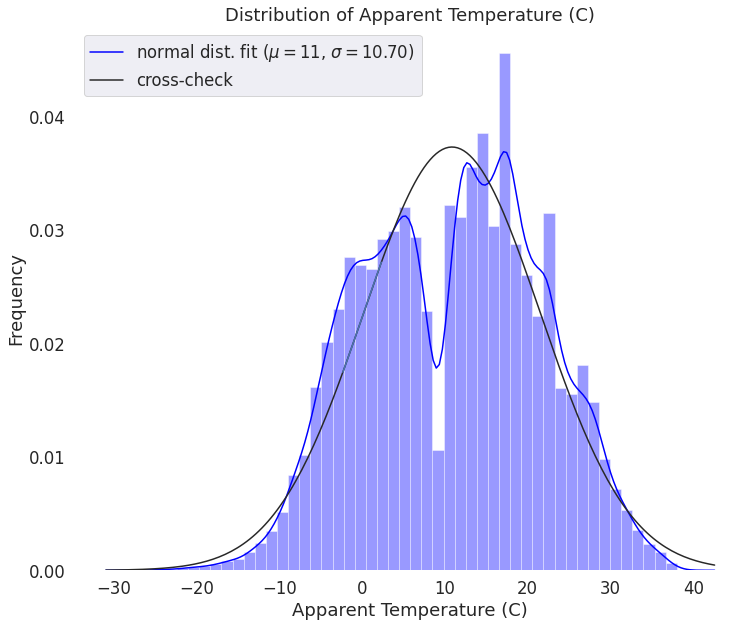

In [24]:
plot_t = num_col[1]
create_distplot(df[plot_t],"blue",plot_t)

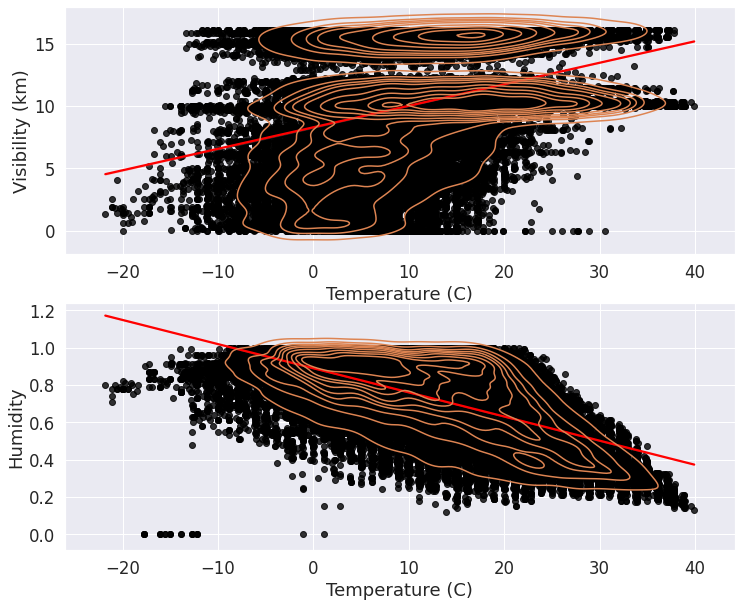

In [25]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.regplot(data=df , x="Temperature (C)",y="Visibility (km)" ,scatter_kws={"color": "black"}, line_kws={"color": "red"} )
sns.kdeplot(data =df , x="Temperature (C)",y="Visibility (km)")

plt.subplot(2,1,2)
sns.regplot(data=df , x="Temperature (C)",y="Humidity" ,scatter_kws={"color": "black"}, line_kws={"color": "red"} )
sns.kdeplot(data =df , x="Temperature (C)",y="Humidity")


plt.show()

Here the plot which we have made is the Scatter Plot of the data with Regreesion line which has the contour of the Disribution Plotted over it.

# And I know here comes the Why, do i need to this ...!

after everything i have dont to get a better understanding of the data.

Lets see, 

- First thing we have here is a scatter plot.

    The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses 
for Example : 

```python
sns.lmplot(x ='total_bill', y ='tip', data = dataset, 
           col ='sex', row ='time', hue ='smoker')
```
<img src="https://seaborn.pydata.org/_images/regression_42_0.png">

In the above code, we draw multiple plots by specifying a separation with the help of the rows and columns. Each row contains the plots of tips vs the total bill for the different times specified in the dataset. Each column contains the plots of tips vs the total bill for the different genders. A further separation is done by specifying the hue parameter on the basis of whether the person smokes.

- Contour Plot : 
    A contour plot is a graph that you can use to explore the potential relationship between three variables.

    Contour plots display the 3-dimensional relationship in two dimensions, with x- and y-factors (predictors) plotted on the x- and y-scales and response values represented by contours.

    A contour plot is like a topographical map in which x-, y-, and z-values are plotted instead of longitude, latitude, and elevation.

```r
library(plotly)
plot_ly(z = volcano, type = "contour")
```


<img src="https://qphs.fs.quoracdn.net/main-qimg-38871bb72d6021bcadd74d934e1ae9f6-pjlq">

# Handling Categorical Variables

Categorical variables/features are any feature type can be classified into two major types:
- Nominal
- Ordinal

Nominal variables are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable.Ordinal variables, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.

It is a binary classification problem:
the target here is **not skewed** but we use the best metric for this binary classification problem which would be Area Under the ROC Curve (AUC). We can use precision and recall too, but AUC combines these two metrics. Thus, we will be using AUC to evaluate the model that we build on this dataset.

We have to know that computers do not understand text data and thus, we need to convert these categories to numbers. A simple way of doing that can be to use :
- Label Encoding
```python
from sklearn.preprocessing import LabelEncoder
```
- One Hot Encoding
```python
pd.get_dummies()
```

but we need to understand where to use which type of label encoding:

**For not Tree based Machine Learning Algorithms the best way to go will be to use One-Hot Encoding**
- One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. 
- The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction. I find that the judicious combination of one-hot plus PCA can seldom be beat by other encoding schemes. PCA finds the linear overlap, so will naturally tend to group similar features into the same feature

**For Tree based Machine Learning Algorithms the best way to go is with Label Encoding**

- LabelEncoder can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.

# Looking at Other Non-Numeric Variables in our Data

<img src="https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif">

# What are Word Clouds?

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, from blog posts to databases. They can also help business users compare and contrast two different pieces of text to find the wording similarities between the two.

Perhaps you’re already leveraging advanced data visualization techniques to turn your important analytics into charts, graphs, and infographics. This is an excellent first step, as our brains prefer visual information over any other format.

Yet, what do you do if your raw data is text-based in nature?

Much of the research your organization conducts will include at least some form of an open-ended inquiry that prompts respondents to give a textual answer.

For instance, you might ask current customers what they like or don’t like about your new product line. Or, you could ask them to give suggestions on how your organization could improve. They could also have the chance to elaborate on any pain points they’re experiencing.

There are industry tools that allow you to code such open-ended data so users can understand it quantitatively. Yet, these don’t come cheap. Word clouds offer a cost-effective, yet powerful, alternative.

With these, you can still quantify your text-based insights into measurable analytics. The only difference? You won’t create a chart or graph as you would with a set of numbers.

Instead, you’ll create a word cloud generator to transform the most critical information into a word cloud.

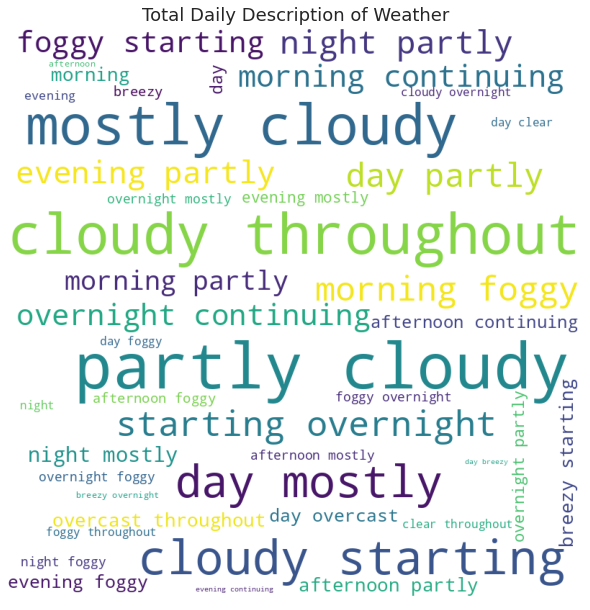

In [26]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df["Daily Summary"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    pass
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.gca().set_title('Total Daily Description of Weather')
plt.show()   

## Creating plots which have diifferent meaning for Raning and Snowing. To get the correct Type of Daily Summary which was used on which kind of weather

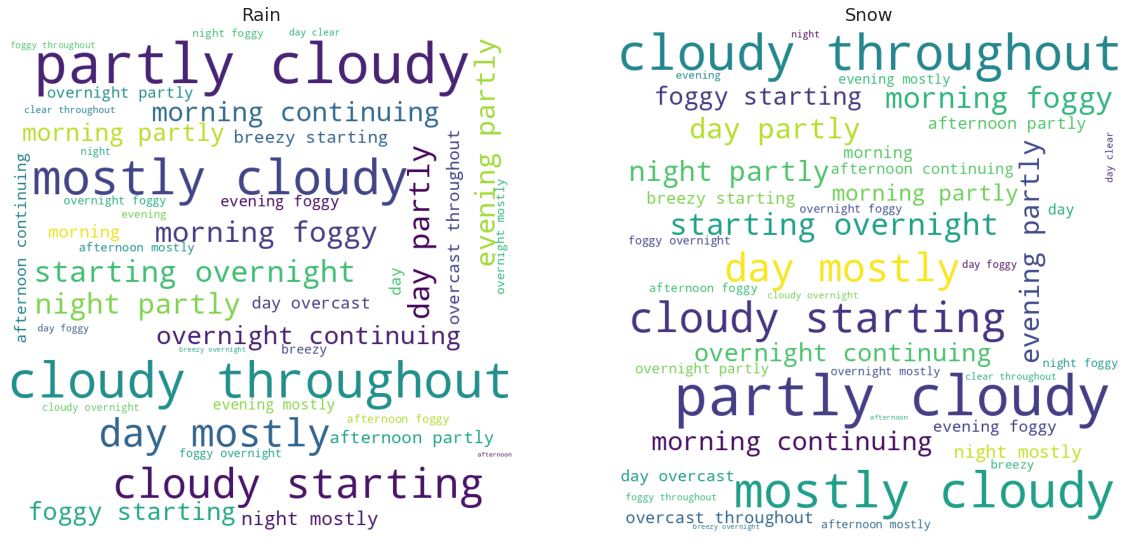

In [27]:
# iterate through the csv file
for val in df[df["Precip Type"] == "rain"]["Daily Summary"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    pass
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image   

plt.figure(figsize = (20, 18), facecolor = None)
ax = plt.subplot(1,2,1)
plt.imshow(wordcloud)
plt.axis("off")
plt.gca().set_title('Rain')

for val in df[df["Precip Type"] == "snow"]["Daily Summary"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    pass
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
plt.subplot(1,2,2)
plt.imshow(wordcloud)
plt.gca().set_title('Snow')
plt.axis("off")
plt.show()   

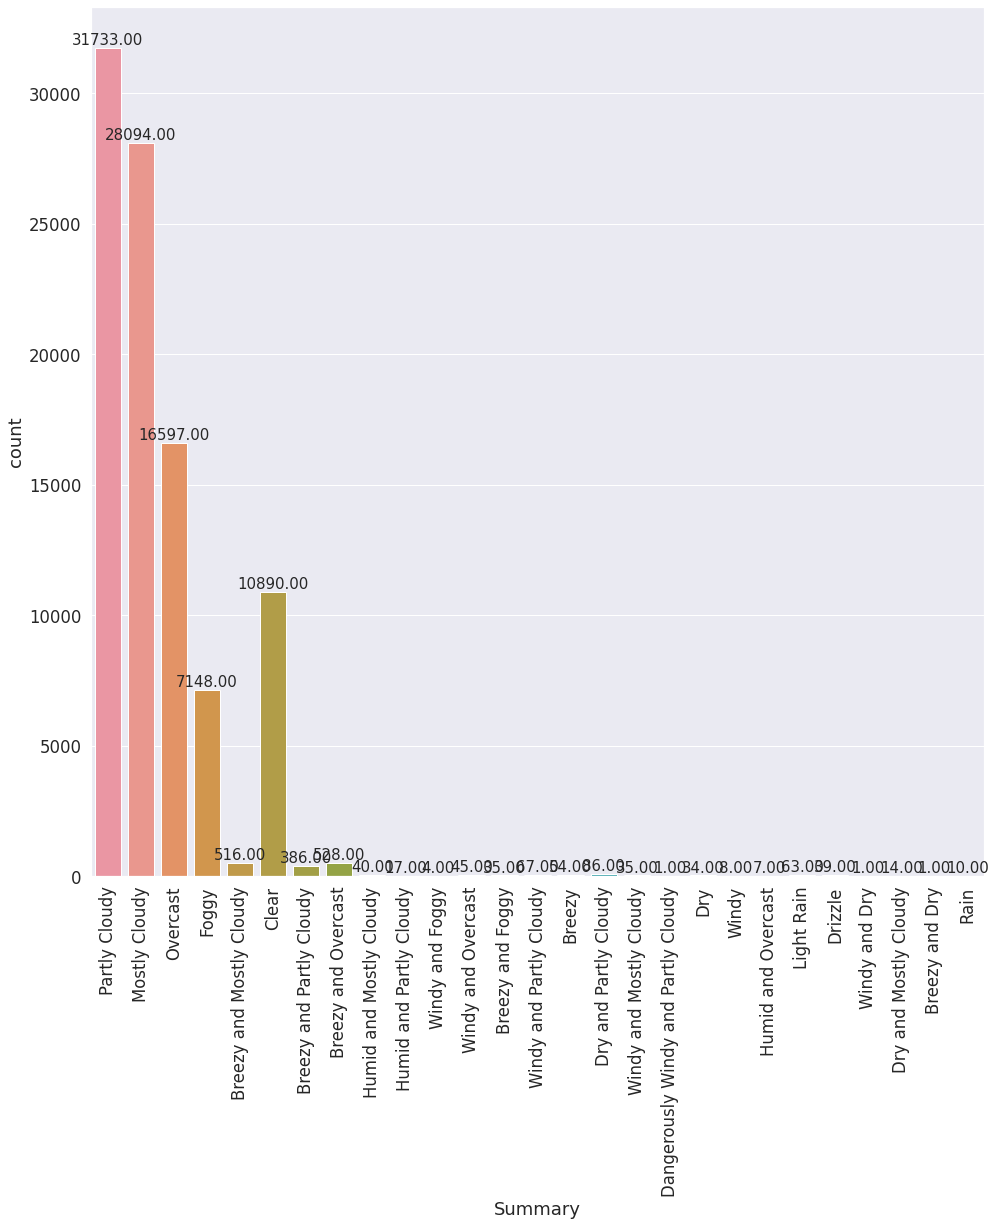

In [28]:
plt.figure(figsize=(16,16))
g = sns.countplot(df.Summary)
annotate_plot(g)
plt.xticks(rotation=90)
plt.show()

Man This was a long but i hope you guys enjoyed it.

Thankyou for reading this far.

**If You liked this Kernel Please do upvote it 👍👍**

<img src="https://media.giphy.com/media/NKkZbYYsZmRzi/giphy.gif">

# Further Readings if interested!!!!

I have created these notebooks as well for anyone who is intereseted in learning new things in the domain of machine learning application. Please refer to them if interested.😁
- Notebook : [A Guide to Any Classification Problem](https://www.kaggle.com/durgancegaur/a-guide-to-any-classification-problem) 
- Notebook : Automating the Machine Learning workflow using [AutoXGB : XGBoost + Optuna](https://www.kaggle.com/durgancegaur/autoxgb-xgboost-optuna-score-0-95437-dec) 
- Notebook : [Working with CatBoost](https://www.kaggle.com/durgancegaur/tps-dec-hyperp-tuning-catboost-score-0-95451)
- Notebook : Working with data imbalance and [upsampling of data SMOTE](https://www.kaggle.com/durgancegaur/working-with-data-imbalance-eda-99-auc)
- Notebook : Working wtih [H2OAuoML](https://www.kaggle.com/durgancegaur/eda-and-working-with-h2oautoml)


<img src="https://media.giphy.com/media/wsWaiO3gBYXyZeq9v2/giphy.gif">